# Coding Exercises (Part 15)

## Financial Portfolios

### Exercise 15 : Creating, analyzing and optimizing Portfolios 

Now, you will have the opportunity to analyze your own dataset. <br>
__Follow the instructions__ and insert your code! You are either requested to 
- Complete the Code and __Fill in the gaps__. Gaps are marked with "__---__" and are __placeholders__ for your code fragment 
- Write Code completely __on your own__ 

In some exercises, you will find questions that can only be answered, if your code is correct and returns the right output! The correct answer is provided below your coding cell. There you can check whether your code is correct.

If you need a hint, check the __Hints Section__ at the end of this Notebook. Exercises and Hints are numerated accordingly.

If you need some further help or if you want to check your code, you can also check the __solutions notebook__.

### Have Fun!

--------------------------------------------------------------------------------------------------------------

## Option 1: Self_guided

Import the us stocks dataset (__us_stocks.csv__) and select the 5-Year period from __31-12-2013__ (incl.) until __31-12-2018__ (incl.). Save the DataFrame in the variable __stocks__ and work through the next questions with this DataFrame!

Create __10,000 random portfolios__ where weights of constituents __sum up to 1__ (all weights must be __between 0 and 1__). Use __np.random.seed(123)__!

Calculate __annualized risk and return__ for the __six stocks__ and for the 10,000 __random portfolios__! Calculation shall be based on __daily__ returns (__simple__ returns). __Visualize__! (Use the user-defined function ann_risk_return)

In [ ]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

Assume that the approximate __risk-free asset__ showed a return of __1.7%__ p.a. (5-Year US Treasury Note). __Calculate__ the __Sharpe Ratio__ for the __six stocks__ and for the 10,000 __random portfolios__! __Visualize__ again (Sharpe Ratio as "Third Dimension")!

Search for the __Max Sharpe Ratio Portfolio__ (from the set of 10,000 random portfolios) and determine __risk, return and Sharpe Ratio__ of the Max Sharpe Ratio Portfolio!

Determine the __weights of the constituents__ in the Max Sharpe Ratio Portfolio and, if your computing power allows for this, __increase__ the __number of random portfolios__. Which stocks do you think have an __actual weight of 0__ in the "real" Max Sharpe Ratio Portfolio that can be derived with Optimization Algorithms? Can you identify a __highly concentrated position__ in one Stock?  

------------------------

## Option 2: Guided and Instructed

# STOP HERE, IF YOU WANT TO DO THE EXERCISE ON YOUR OWN!

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [4]:
#run the cell!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

pd.options.display.float_format = '{:.2f}'.format

146. __Import__ the __us_stocks.csv__ file and select the __appropriate Price Data__ to calculate __Total Returns__! (Close vs. Adj Close) <br> __Assign__ the variable __stocks__! __Fill in the gaps!__

In [5]:
stocks = pd.read_csv("data/us_stocks.csv", header = [0,1], index_col = [0], parse_dates = [0])['Close']

147. __Select__ the 5-Year Period from __2014__ (incl.) until __2018__ (incl.) and __overwrite stocks__! (Hint: Start with "2013-12-31")

In [7]:
stocks = stocks.loc['2014':'2018']

In [8]:
#run the cell!
stocks.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2014-01-02,89.45,54.71,25.79,96.41,80.54,78.91
2014-01-03,89.74,54.56,25.78,96.54,80.45,78.65
2014-01-06,89.70,57.20,25.46,95.85,80.64,78.21
2014-01-07,89.36,57.92,25.59,96.38,81.42,78.45
2014-01-08,89.41,58.23,25.43,95.41,80.24,77.83


In [9]:
#run the cell!
stocks.tail()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2018-12-21,91.33,124.95,44.84,174.15,90.97,87.13
2018-12-24,89.50,124.06,43.59,170.28,87.36,85.82
2018-12-26,93.84,134.18,46.19,174.03,90.09,90.41
2018-12-27,94.68,134.52,46.36,175.71,92.02,91.59
2018-12-28,94.42,133.20,46.75,175.56,91.18,92.13


148. For the calculation of __annualized risk and return__, please use the following user-definded function __ann_risk_return__. __Fill in the gaps__!

In [16]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

149. Calculate __daily returns__ (simple returns) for stocks and save the resulting DataFrame in the variable __ret__!

In [13]:
ret = stocks.pct_change().dropna()

In [14]:
# run the cell!
ret.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2014-01-03,0.00,-0.00,-0.00,0.00,-0.00,-0.00
2014-01-06,-0.00,0.05,-0.01,-0.01,0.00,-0.01
2014-01-07,-0.00,0.01,0.01,0.01,0.01,0.00
2014-01-08,0.00,0.01,-0.01,-0.01,-0.01,-0.01
2014-01-09,-0.01,-0.02,-0.00,0.00,0.00,0.00


150. Calculate __annualized risk and return__ for the six stocks! Save the resulting DataFrame in the variable __summary__.<br>
__Fill in the gaps__!

In [17]:
summary = ann_risk_return(ret)

In [18]:
# run the cell!
summary

,Return,Risk
AXP,0.03,0.21
FB,0.22,0.30
INTC,0.15,0.25
MCD,0.13,0.17
PG,0.04,0.15
WMT,0.05,0.19


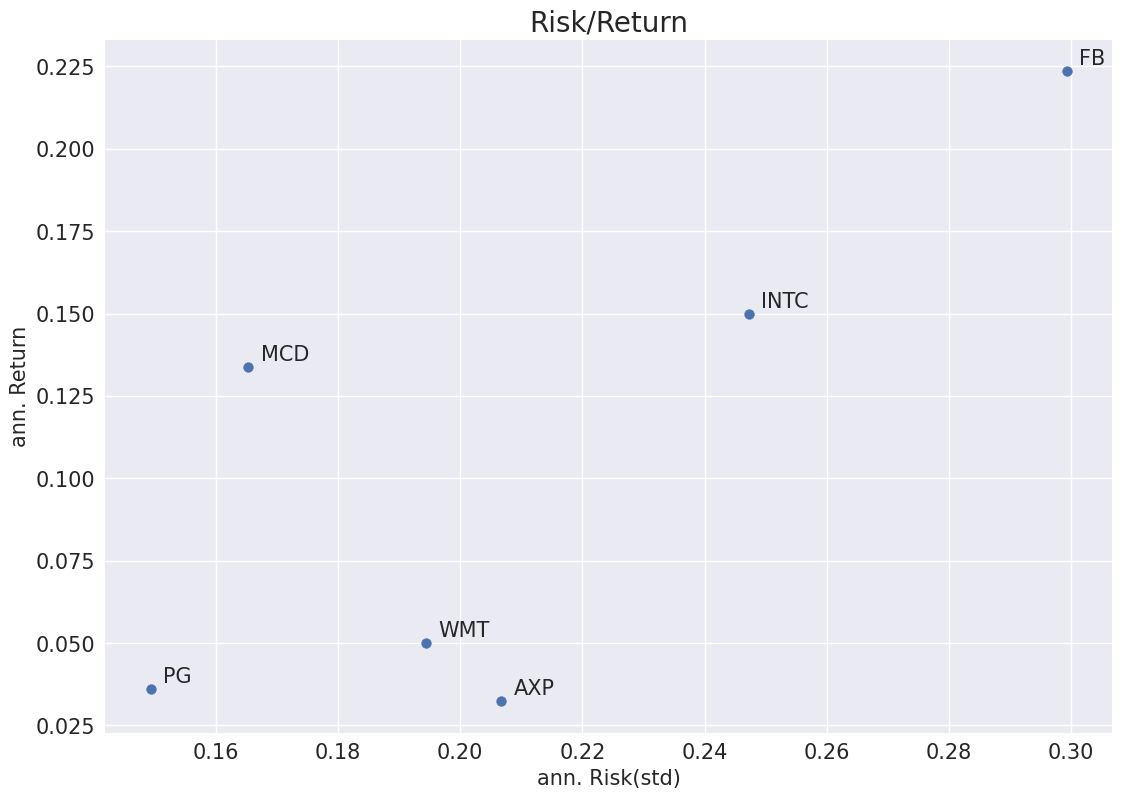

In [19]:
#run the cell!
summary.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (13,9), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

151. __Assign__ the __number of constituents/stocks__ to the variable __noa__ and the __number of random portfolios (10,000)__ to the variable __nop__! <br>
__Fill in the gaps__!

In [20]:
noa = len(stocks.columns)
nop = 10000
print(noa, nop)

6 10000


152. Create a __numpy array__ with __10,000 rows and 6 columns__, each element being a __random float__ between 0 and 1. <br> __Save__ the matrix in the variable __matrix__. Use __123__ as __random seed__! __Fill in the gaps__!

In [24]:
np.random.seed(123)
matrix = np.random.random(noa * nop).reshape(nop, noa)
matrix

array([[6.96469186e-01, 2.86139335e-01, 2.26851454e-01, 5.51314769e-01,
        7.19468970e-01, 4.23106460e-01],
       [9.80764198e-01, 6.84829739e-01, 4.80931901e-01, 3.92117518e-01,
        3.43178016e-01, 7.29049707e-01],
       [4.38572245e-01, 5.96778966e-02, 3.98044255e-01, 7.37995406e-01,
        1.82491730e-01, 1.75451756e-01],
       ...,
       [1.54233601e-01, 7.01517016e-01, 1.88272835e-04, 3.16434625e-03,
        1.48153795e-01, 2.36841411e-01],
       [9.81419821e-01, 1.77248729e-01, 5.26242589e-01, 2.01518574e-01,
        5.34389538e-01, 4.38449038e-01],
       [7.06401840e-01, 5.68738882e-01, 2.55139068e-01, 3.55529043e-02,
        3.93868332e-01, 1.32760524e-01]])

153. Create the __weights__ array! The weights of constituents in each portfolio must __sum up to 1__! __Fill in the gaps__!

In [25]:
weights = matrix / matrix.sum(axis = 1, keepdims= True)

In [26]:
# run the cell
weights

array([[2.39884666e-01, 9.85548824e-02, 7.81343758e-02, 1.89889175e-01,
        2.47806474e-01, 1.45730427e-01],
       [2.71614294e-01, 1.89657765e-01, 1.33189995e-01, 1.08593608e-01,
        9.50402295e-02, 2.01904109e-01],
       [2.20141008e-01, 2.99552753e-02, 1.99798014e-01, 3.70436238e-01,
        9.16015868e-02, 8.80678770e-02],
       ...,
       [1.23972184e-01, 5.63875809e-01, 1.51332747e-04, 2.54348542e-03,
        1.19085267e-01, 1.90371922e-01],
       [3.43241600e-01, 6.19909399e-02, 1.84047993e-01, 7.04790714e-02,
        1.86897305e-01, 1.53343091e-01],
       [3.37593701e-01, 2.71803743e-01, 1.21932500e-01, 1.69909475e-02,
        1.88232052e-01, 6.34470553e-02]])

In [27]:
# run the cell
weights.sum(axis = 1, keepdims= True)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

154. __Calculate daily returns__ for 10,000 random portfolios and __save__ the resulting DataFrame in the variable __port_ret__! __Fill in the gaps!__

In [28]:
port_ret = ret.dot(weights.T)

In [29]:
# run the cell
port_ret.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-03,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00
2014-01-06,0.00,0.01,-0.00,0.00,0.00,0.01,0.01,0.00,0.01,0.00,...,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.03,-0.00,0.01
2014-01-07,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.01,0.01,0.01,...,0.01,0.00,0.01,0.01,0.01,0.01,0.00,0.01,0.00,0.00
2014-01-08,-0.01,-0.00,-0.01,-0.01,-0.00,-0.01,-0.00,-0.01,-0.01,-0.01,...,-0.00,-0.01,-0.01,-0.00,-0.00,-0.01,-0.01,-0.00,-0.01,-0.00
2014-01-09,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,...,-0.01,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,-0.01,-0.00,-0.01


155. Calculate __annualized risk and return__ for the 10,000 random portfolios and __save__ the resulting DataFrame in the variable __port_summary__!

In [30]:
port_summary = ann_risk_return(port_ret)

In [31]:
# run the cell
port_summary.tail()

,Return,Risk
9995,0.12,0.14
9996,0.09,0.13
9997,0.14,0.19
9998,0.08,0.14
9999,0.10,0.16


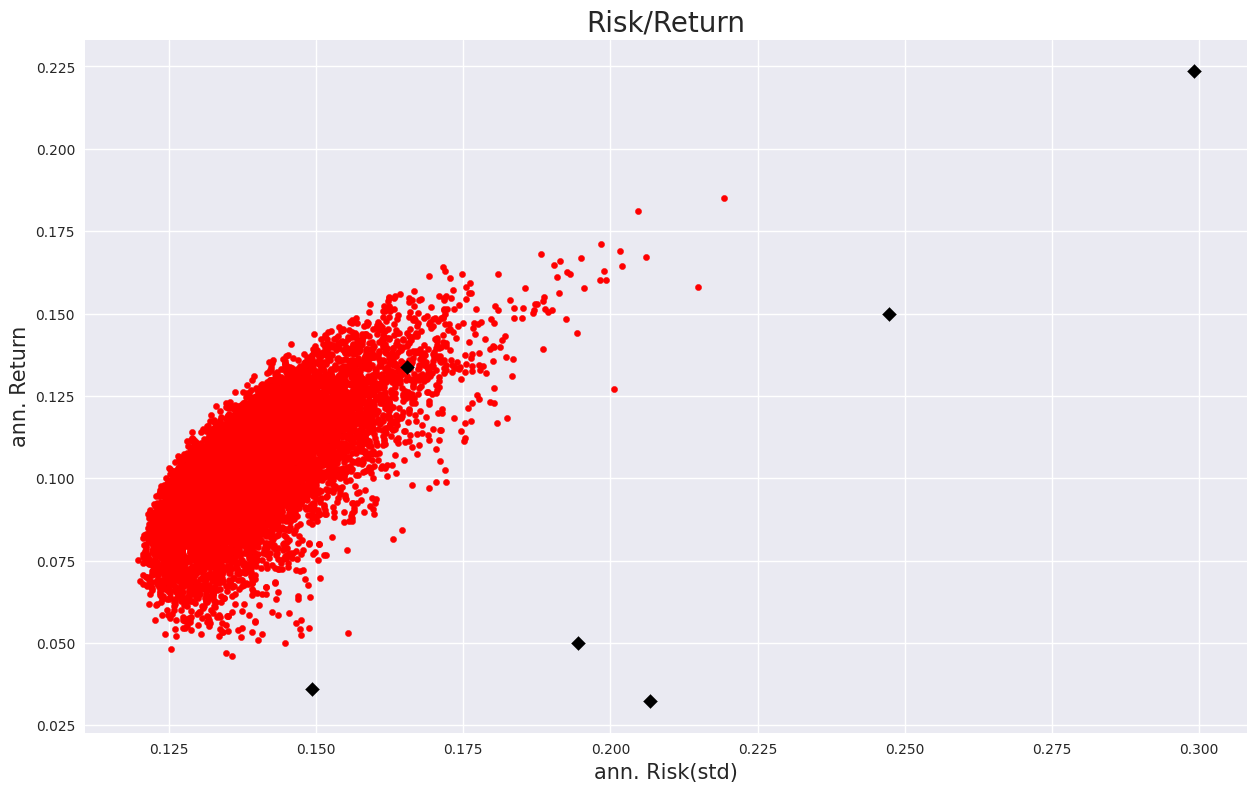

In [32]:
# run the cell!
plt.figure(figsize = (15, 9))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"],s= 20, color = "red")
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"], s= 50, color = "black", marker = "D")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

156. As an approximation for the __risk-free asset__, we use a __5-Year US Treasury Note__ that was issued at the end of 2013.<br>
The __Coupon Rate__ for that particular Note was __1.7% p.a.__. Assign __risk-free-return__ and __risk-free-risk__! __Fill in the gaps__!

In [33]:
# run the cell!
risk_free_return = 0.0017
risk_free_risk = 0

In [34]:
# run the cell!
rf = [risk_free_return, risk_free_risk]
rf

[0.0017, 0]

In [35]:
# run the cell!
summary

,Return,Risk
AXP,0.03,0.21
FB,0.22,0.30
INTC,0.15,0.25
MCD,0.13,0.17
PG,0.04,0.15
WMT,0.05,0.19


157. __Calculate__ the __Sharpe Ratio__ for the __six constituent stocks__! __Add__ the new column __"Sharpe"__ to summary! __Fill in the gaps__! <br>
Which stock showed the __highest Sharpe Ratio__?

In [36]:
summary["Sharpe"] = (summary["Return"].sub(rf[0]))/summary["Risk"]

In [37]:
# run the cell!
summary

,Return,Risk,Sharpe
AXP,0.03,0.21,0.15
FB,0.22,0.30,0.74
INTC,0.15,0.25,0.60
MCD,0.13,0.17,0.80
PG,0.04,0.15,0.23
WMT,0.05,0.19,0.25


The highest Sharpe Ratio has ... McDonalds!

158. __Calculate__ the __Sharpe Ratio__ for the __random portfolios__! __Add__ the new column __"Sharpe"__ to port_summary! __Fill in the gaps__! <br>
What is the __maximum Sharpe Ratio__?

In [38]:
port_summary["Sharpe"] = (port_summary["Return"].sub(rf[0]))/port_summary["Risk"]

In [39]:
# run the cell!
port_summary.tail()

,Return,Risk,Sharpe
9995,0.12,0.14,0.85
9996,0.09,0.13,0.68
9997,0.14,0.19,0.73
9998,0.08,0.14,0.54
9999,0.10,0.16,0.65


In [40]:
# run the cell!
port_summary.describe()

,Return,Risk,Sharpe
count,10000.00,10000.00,10000.00
mean,0.10,0.14,0.72
std,0.02,0.01,0.10
min,0.05,0.12,0.33
25%,0.09,0.13,0.67
50%,0.10,0.14,0.74
75%,0.12,0.15,0.79
max,0.19,0.22,0.95


The highest Sharpe Ratio is ... 1.00

159. __Plot__ the __random portfolios__ and the __constituents__ with the __Sharpe Ratio__ as being the "third dimension" of the graph.<br>
__Select__ appropriate values for __vmin__ and __vmax__ to get the most out of this plot (trial-and-error)! __Fill in the gaps__!

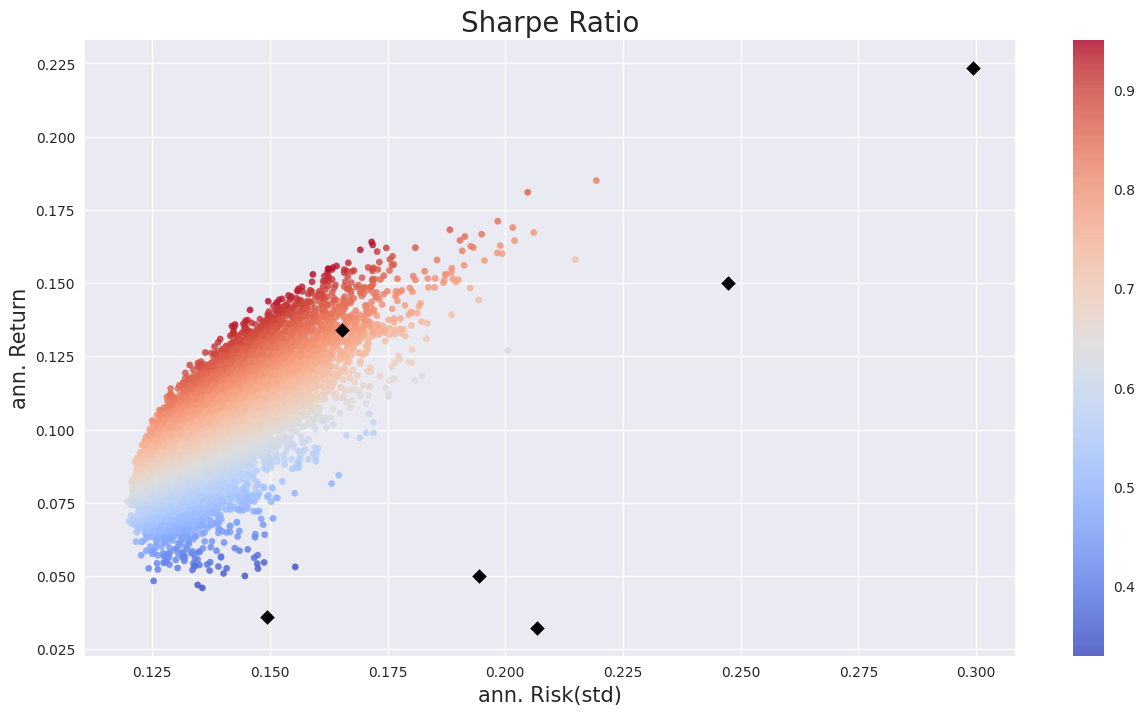

In [41]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, 
            c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.33, vmax = 0.95, alpha = 0.8)
plt.colorbar()
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"],s= 50, marker = "D", c = "black")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Sharpe Ratio", fontsize = 20)
plt.show()

160. Get the __row label__ of the __Max Sharpe Ratio__ Portfolio and __save__ the label in the variable __msrp__!<br>
__Fill in the gaps__! Which __portfolio__ has the __highest Sharpe Ratio__? 

In [43]:
msrp = port_summary.Sharpe.idxmax()
msrp

np.int64(9714)

It´s portfolio no. 4555.

161. Get __Risk__, __Return__ and __Sharpe Ratio__ of the Max Sharpe Ratio Portfolio! __Fill in the gaps__! <br>
What are __Risk and Return__ of the Max Sharpe Ratio Portfolio?

In [44]:
port_summary.loc[msrp]

Return   0.14
Risk     0.15
Sharpe   0.95
Name: 9714, dtype: float64

The Max Sharpe Ratio Portfolio showed a Return of ... 16% and a Risk of ... 14%. 

162. __Filter__ the array weights for the __weights of the constituents__ in the __Max Sharpe Ratio Portfolio__ and __save__ them in the variable __msrp_w__! <br> __Fill in the gaps__!

In [45]:
msrp_w = weights[msrp, :]
msrp_w

array([0.02986328, 0.24695537, 0.12822345, 0.4441674 , 0.11064558,
       0.04014491])

163. __Run__ the cell below! Do you think that the stocks __AXP, PG and WMT__ have any weights (__> 0__) in the "real" Max Sharpe Ratio Portfolio that can be derived with Optimization Algorithms? <br>
You can figure this out more precisely by __increasing the number of random portfolios__ (recommended only if your computing power is appropriate for this).

In [46]:
# run the cell
pd.Series(index = stocks.columns, data = msrp_w)

AXP    0.03
FB     0.25
INTC   0.13
MCD    0.44
PG     0.11
WMT    0.04
dtype: float64

No, in the "real" Max Sharpe Ratio Portfolio, the stocks AXP, PG and WMT have zero weight. Run and inspect below!

In [47]:
#run the cell!
opt_weights = np.array([1.09440739e-16, 1.87717305e-01, 1.91216238e-01, 6.21066456e-01,
       0.00000000e+00, 3.52446496e-17])

In [48]:
#run the cell!
pd.Series(index = stocks.columns, data = opt_weights)

AXP    0.00
FB     0.19
INTC   0.19
MCD    0.62
PG     0.00
WMT    0.00
dtype: float64

Even if this is the best Portfolio, it´s pretty much concentrated in the MCD stock (62%).

# Well Done!

-------------------

# Hints (Spoiler!)

146. Use Adjusted Close Prices

147. stocks = stocks.loc[--- : ---]

148. agg() method, std

149. pct_change() and dropna() methods

150. pass DataFrame ret to ann_risk_return()

151. len() function, 10,000 portfolios

152. Create 10,000 * 6 random floats in total, reshape() method

153. sum() method

154. dot() method

155. pass port_ret to our user-defined function

156. The return is 1.7% and the risk of the risk-free asset is...?

157. Sharpe Ratio = (Stock Return - Risk Free Return) / Stock Risk

158. Sharpe Ratio = (Portfolio Return - Risk Free Return) / Portfolio Risk

159. approx. 0.5 (vmin) and 1.0 (vmax)

160. idxmax() method

161. pass msrp

162. pass msrp

163. Try to increase nop to e.g. 50,000 and re-run all cells! 